# Barycentric Coordinates

The listing of several theorems and principles for working with barycentric coordinates (including finding point in polygon)
To learn more continue from the middle of [the video here](https://www.youtube.com/watch?v=X6g0IyJsQXU&list=PLtOnbOq_QGQghqF9N5ntauCdSG5IhCR6v)

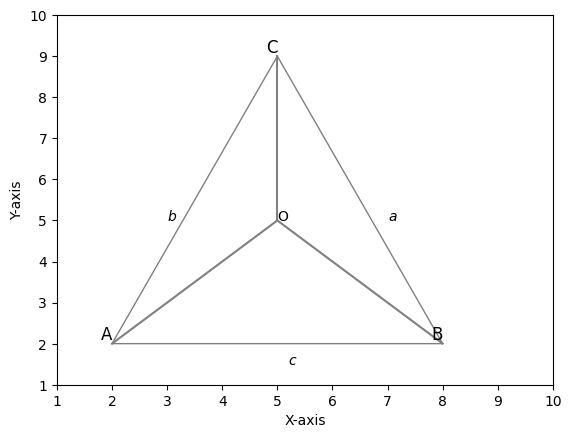

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Triangle
vertices = [(2, 2), (8, 2), (5, 9)]
triangle = Polygon(vertices, closed=True, facecolor="none", edgecolor="black", alpha=0.5)

for (x,y) in vertices:
    plt.plot([x, 5], [y, 5], c="grey")

vertex_labels = ["A", "B", "C"]
for i, (x, y) in enumerate(vertices):
    plt.text(x, y, vertex_labels[i], fontsize=12, ha="right", va="bottom")

plt.gca().add_patch(triangle)

plt.annotate(r'$b$', xy=(3, 5), xytext=(0, 0), textcoords='offset points')
plt.annotate(r'$a$', xy=(7, 5), xytext=(0, 0), textcoords='offset points')
plt.annotate(r'$c$', xy=(5.2, 1.5), xytext=(0, 0), textcoords='offset points')
plt.annotate("O", xy=(5, 5), xytext=(0, 0), textcoords='offset points')

plt.xlim(1, 10)
plt.ylim(1, 10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## General Prerequesities

1. Point $O$ is circumcenter if all vectors $\vec{A}, \vec{B}, \vec{C}$ are equal
Here $|\vec{A}| = R$ (circumradius)

2. Dot product: $\vec{u}\times\vec{v} = |u||v|cos\theta$
   For $\vec{A}$ -> $\vec{A}\times\vec{A} = |\vec{A}||\vec{A}|cos(0)$ where $cos(0)$ is angle between vector and itself

3. $cos(0) = 1$

   $cos(90\degree)=\frac{\pi}{2}=0$ (because $(x, y) = (0, 1)$)

   $cos\theta = \frac{adjacent}{hypotenuse}$

4. In the triangle with two equal sides (_isosceles_) $R$ the opposide side $c$ will have the formula $c^2 = R^2 + R^2 - 2R * R * cos\theta$ (following `Cosine-Rules`)

   Then we rearrange to $cos\theta = \frac{2R^2 - c^2}{2R^2}$

   Following the above + knowing that $\vec{A}\vec{B} = |\vec{A}||\vec{B}|cos\theta = R^2cos\angle{AOB}$

   We combine formulas to get $R^2(\frac{2R^2 - c^2}{2R^2}) = \frac{2R^2 - c^2}{2} = \color{pink}R^2 - \frac{c^2}{2}$

5. We already know from `Cosine-Rules` that $cos(\theta) = cos(2\pi - \theta)$

The rest reasoning will be in `Barycentric-Coordinates.pdf`

## Derive Same Side Equation

The following triangle is an example


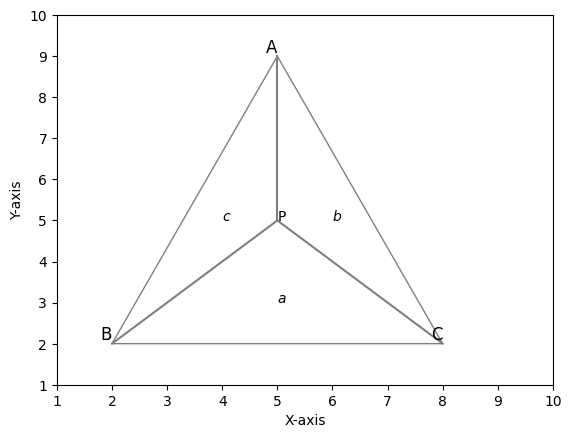

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Triangle
vertices = [(2, 2), (8, 2), (5, 9)]
triangle = Polygon(vertices, closed=True, facecolor="none", edgecolor="black", alpha=0.5)

for (x,y) in vertices:
    plt.plot([x, 5], [y, 5], c="grey")

vertex_labels = ["B", "C", "A"]
for i, (x, y) in enumerate(vertices):
    plt.text(x, y, vertex_labels[i], fontsize=12, ha="right", va="bottom")

plt.gca().add_patch(triangle)

plt.annotate(r'$c$', xy=(4, 5), xytext=(0, 0), textcoords='offset points')
plt.annotate(r'$b$', xy=(6, 5), xytext=(0, 0), textcoords='offset points')
plt.annotate(r'$a$', xy=(5, 3), xytext=(0, 0), textcoords='offset points')
plt.annotate("P", xy=(5, 5), xytext=(0, 0), textcoords='offset points')

plt.xlim(1, 10)
plt.ylim(1, 10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

We know that given:
$$A(x_1, y_1), B(x_2, y_2), C(x_3, y_3)$$
$$a = \frac{[PBC]}{[ABC]}, b = \frac{[PCA]}{[ABC]}, c = \frac{[PAB]}{[ABC]}$$
> Note: `[]` - denotes `Area()`, `a`, `b`, `c` - weights (also sometimes used as `x`, `y`, `z`)

- If $[PBC] = [ABC]$, so $a = 1$, $b = c = 0$, then $P$ is on $A$
- If $a = b = c = \frac{1}{3}$ $P$ is _centroid_
- If $P$ lies on $AB$ $c = 0$
- If any value is negative - $P$ lies outside the triangle

We know that point be can be found using the formula 
$$P = aA + bB + cC$$
Thus:  
&emsp;$P = a(x_1, y_1) + b(x_2, y_2) + c(x_3, y_3)$  
&emsp;$P = (ax_1 + bx_2 + cx_3, ay_1 + by_2 + cy_3)$  

&emsp;$x = ax_1 + bx_2 + cx_3$  
&emsp;$y = ay_1 + by_2 + cy_3$  
&emsp;$a + b + c = 1$

We result in system of equations:
$$\begin{cases} x = ax_1 + bx_2 + cx_3 \\ y = ay_1 + by_2 + cy_3 \\ c = 1 - a - b\end{cases}$$

Solving for `c`:  
&emsp;$x = ax_1+bx_2+(1-a-b)x_3$  
&emsp;$y=ay_1+by_2+(1-a-b)y_3$

We get linear system of equations (simply by openning the parenthesis):
$$\begin{cases} x-x_3 = a(x_1-x_3) + b(x_2-x_3) \\ y-y_3 = a(y_1-y_3) + b(y_2-y_3)\end{cases}$$

We then put it in a matrix form:
$$\begin{bmatrix}x_1-x_3 & x_2 - x_3 \\ y_1 - y_3 & y_2 - y_3\end{bmatrix}\begin{bmatrix}a\\ b\end{bmatrix} = \begin{bmatrix}x-x_3\\ y-y_3\end{bmatrix}$$

Then following _Cramer's rule_ we get this very long result formula (see `assets/matrix_transform.png` screenshot, to be learnt in more details with Cramer's rule):
$$a = \frac{det(\begin{bmatrix}x-x_3 & x_2-x_3 \\ y-y_3 & y_2-y_3\end{bmatrix})}{det(\begin{bmatrix}x_1-x_3 & \color{cyan}x_2-x_3\color{white} \\ y_1-y_3 & y_2-y_3\end{bmatrix})}$$
$$b = \frac{det(\begin{bmatrix}x_1-x_3 & x-x_3 \\ y_1-y_3 & y-y_3\end{bmatrix})}{det(\begin{bmatrix}x_1-x_3 & \color{cyan}x_2-x_3\color{white} \\ y_1-y_3 & y_2-y_3\end{bmatrix})}$$
$$c = 1 - a - b$$

As we can see the denominator is exactly same for $a$ and $b$, so the common denominator is:
$$denom = (y_2-y_3)(x_1-x_3) + \color{cyan}(x_3-x_2)\color{white}(y_1-y_3)$$

> Note: $\color{cyan}colored\color{white}$ parts here, components are swapped because the defaul determinant formula is $$det\begin{bmatrix}a & b\\ c & d\end{bmatrix} = ad - bc$$ but we want to swap the sign to + thus changing $-(x_3-x_2)$ to $(x_2-x_3)$ here


In the end we finalize the formula:
$$a = \frac{(x-x_3)(y_2-y_3) - (x_3-x_2)(y-y_3)}{determinant}$$
$$b = \frac{(x_1-x_3)(y_2-y_3) - (x_3-x)(y_1-y_3)}{determinant}$$
$$c = 1 - a - b$$

And finally to check the if the point lies within the triangle we need to check that each $0 \le a \le 1$ and $0 \le b \le 1$ and $0 \le c \le 1$ (or just greater then `0` I guess is enough
